In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df_airline = pd.read_csv('airline_passenger_traffic.csv',header=None)
df_airline.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.shape

(143, 2)

In [16]:
df_airline.columns=['months','passangers']
df_airline

,months,passangers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [17]:
df_airline.months=pd.to_datetime(df_airline.months,format='%Y-%m')
df_airline.set_index('months')
df_airline.head()

,months,passangers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


## Time series analysis

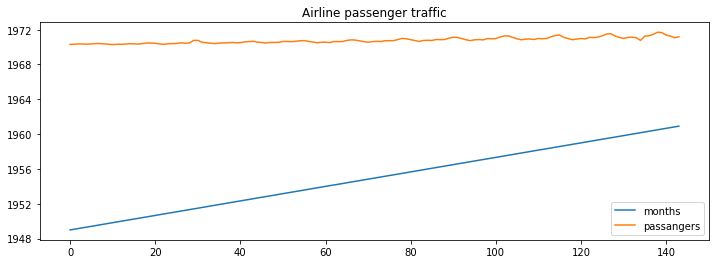

In [28]:
df_airline.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

In [19]:
df_airline.isna().sum()

months        0
passangers    4
dtype: int64

In [21]:
int(df_airline.passangers.mean())

280

In [22]:
df_airline.passangers.fillna(int(df_airline.passangers.mean()),inplace=True)

<Figure size 864x720 with 0 Axes>

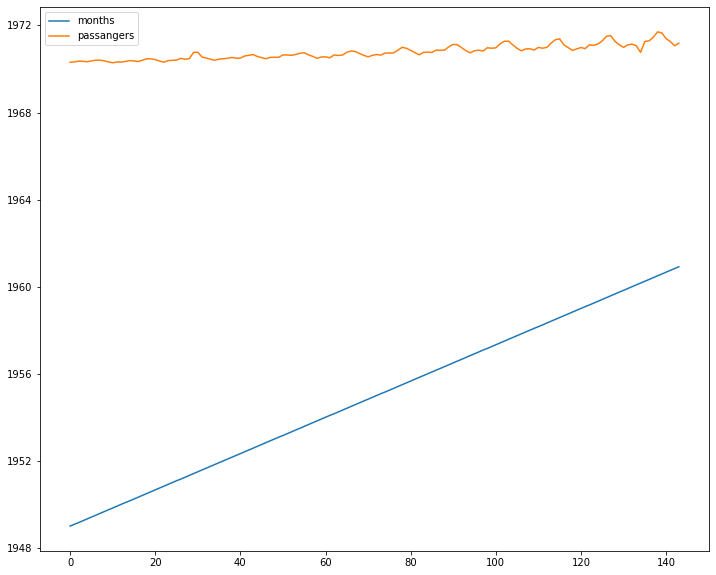

In [23]:
plt.figure(figsize=(12,10))
df_airline.plot(figsize=(12,10))
plt.show(block=False)

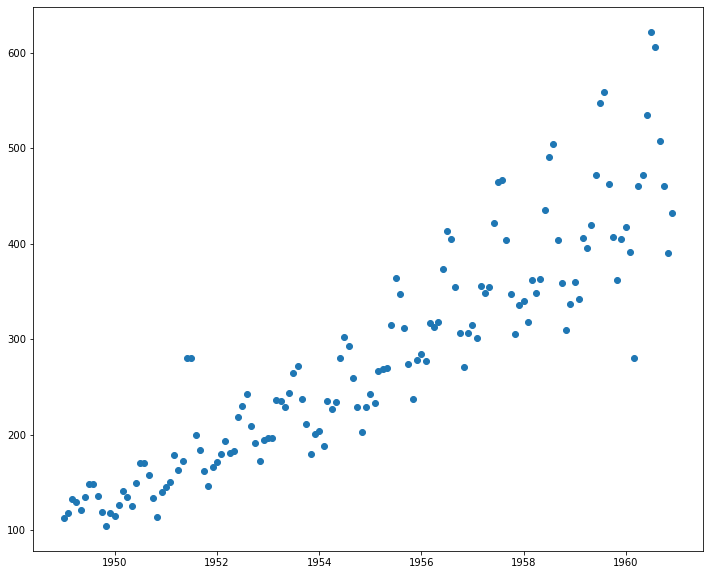

In [26]:
plt.figure(figsize=(12,10))
plt.scatter(data=df_airline,x='months',y='passangers')

In [27]:
df_airline.passangers.mean()

280.71527777777777

In [45]:
df_m = pd.read_csv('Metrail_dataset.csv') 
df_m.columns=['months','travellers']

In [34]:
df_m.head()

,months,travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [46]:
df_m.isna().sum()

months         0
travellers    11
dtype: int64

In [47]:
int(df_m.travellers.mean())

1837

In [48]:
df_m.travellers.fillna(1837,inplace=True)

In [50]:
df_m.travellers.mean()

1837.5094339622642

In [51]:
df_m = pd.read_csv('Metrail_dataset.csv') 
df_m.columns=['months','travellers']
df_m.head()

,months,travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [52]:
df_m.travellers=df_m.travellers.interpolate(method='linear')

In [53]:
df_m.travellers.mean()

1836.566037735849

array([[<AxesSubplot:title={'center':'travellers'}>]], dtype=object)

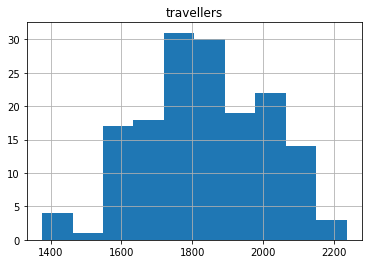

In [54]:
df_m.hist()

<AxesSubplot:>

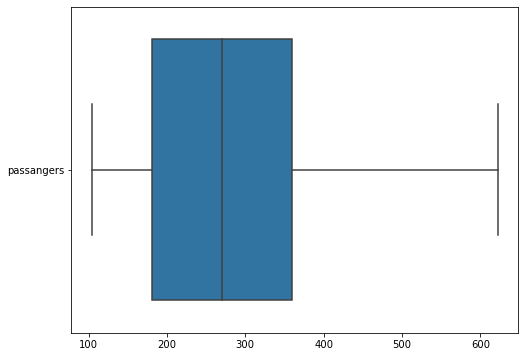

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_airline,orient='horizontal',whis=1.5)#1.5(+-)whis = outlier range

In [69]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   months      144 non-null    datetime64[ns]
 1   passangers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [70]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_airline.Months, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Months'

In [67]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decompostion = sm.tsa.seasonal_decompose(df_airline, model='additive')
fig=decompostion.plot()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [2]:
df_exchange = pd.read_csv('exchange-rate-twi.csv')
df_exchange.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
df_exchange.columns=['month','exchange_rate']

In [4]:
df_exchange

,month,exchange_rate
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
...,...,...
299,300,49.6
300,301,48.5
301,302,48.4
302,303,51.0


In [6]:
df_exchange.shape

(304, 2)

In [5]:
df_exchange_test=df_exchange.head(212)
df_exchange_test.shape

(212, 2)

In [7]:
df_exchange_train = df_exchange.tail(len(df_exchange)-212)
df_exchange_train.shape

(92, 2)

In [18]:
y_hat_avg = df_exchange_train.copy()
y_hat_avg['avg_exchange_rate_forecast'] = df_exchange_train['exchange_rate'].mean()

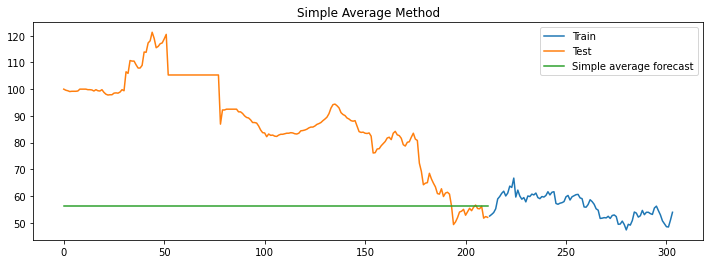

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df_exchange_train['exchange_rate'], label='Train')
plt.plot(df_exchange_test['exchange_rate'], label='Test')
plt.plot(y_hat_avg['avg_exchange_rate_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

In [19]:
rmse = np.sqrt(mean_squared_error(df_exchange_train['exchange_rate'], y_hat_avg['avg_exchange_rate_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_exchange_train['exchange_rate']-y_hat_avg['avg_exchange_rate_forecast'])/df_exchange_train['exchange_rate'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Simple average method,4.27,6.77


In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv('bitcoinfinal.csv', header = None)
data.columns = ['months','price']
data.head(12)

,months,price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7
5,5,262.9
6,6,284.5
7,7,231.4
8,8,236.5
9,9,316.0


In [47]:
data.shape

(32, 2)

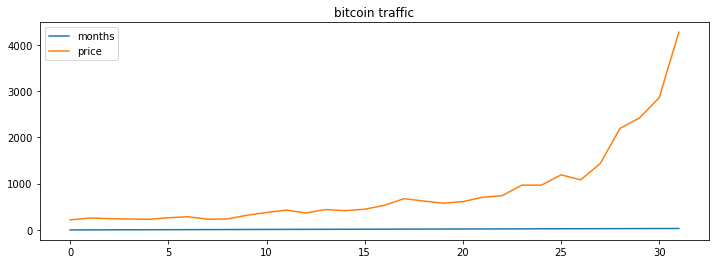

In [48]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('bitcoin traffic')
plt.show(block=False)

In [49]:
data.isna().sum()

months    0
price     0
dtype: int64

In [38]:
from pylab import rcParams
import statsmodels.api as sm

In [50]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.months, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [51]:
data.head()

,months,price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [52]:
len(data)

32

In [53]:
train_len = 29
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [54]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['price'][train_len-1]

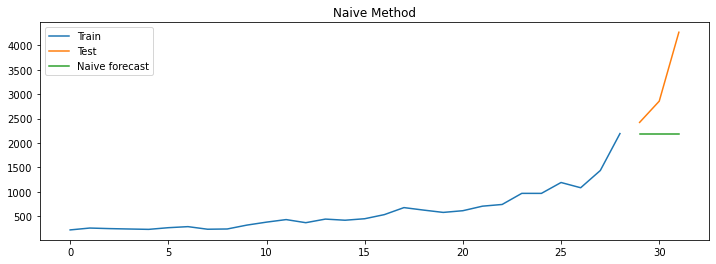

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_naive['naive_forecast'])/test['price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [58]:
#Simple average method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['price'].mean()

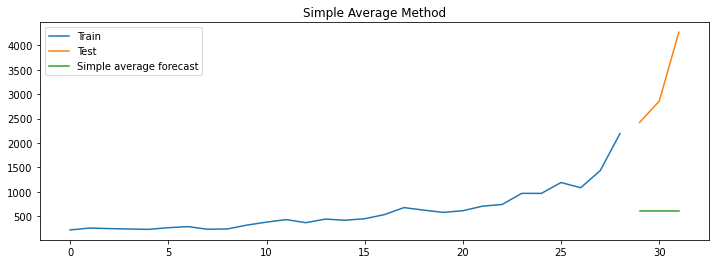

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_avg['avg_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


In [61]:
#Simple moving average method

In [62]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['price'][train_len-1]

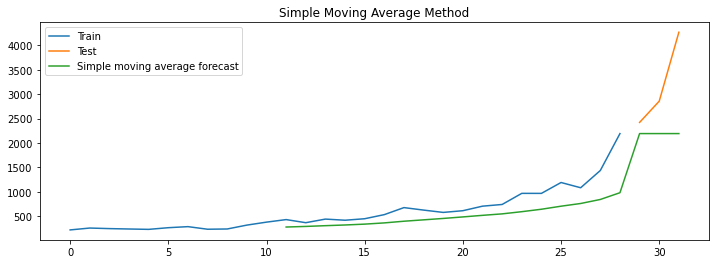

In [63]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [64]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1265.90,27.12


#Exponential smoothing methods`

In [65]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['price'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

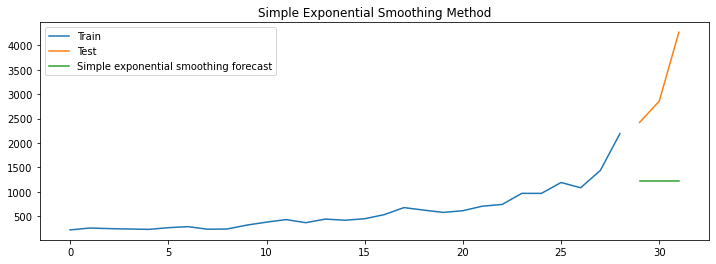

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_ses['ses_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1265.90,27.12
0,Simple exponential smoothing forecast,2107.13,59.17


In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 217.4, 'initial_trend': 38.29999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


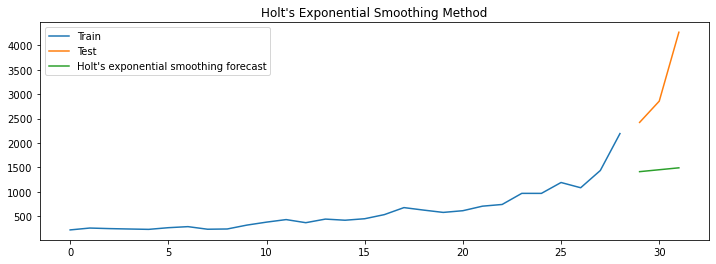

In [69]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [71]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_holt['holt_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1265.90,27.12
0,Simple exponential smoothing forecast,2107.13,59.17
0,Holt's exponential smoothing method,1889.86,52.00


In [ ]:
#Holt Winters' additive method with trend and seasonality

In [74]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.624966890022127, 'smoothing_trend': 0.5961528558143976, 'smoothing_seasonal': 0.3597647701994941, 'damping_trend': nan, 'initial_level': 479.17621055887906, 'initial_trend': 26.550579768486735, 'initial_seasons': array([-293.26094352, -319.00562558, -348.9140801 , -259.7541799 ,
       -207.92324728, -217.18272732, -229.7957364 , -280.40111861,
       -274.82022844, -212.1203594 , -169.31385224, -101.68575335]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
#Plot train, test and forecas

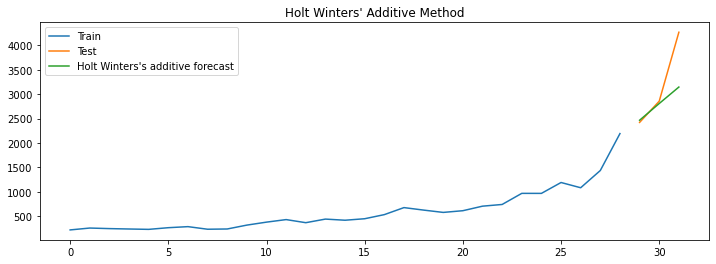

In [76]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [75]:
#Calculate RMSE and MAPE

In [77]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_hwa['hw_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1265.90,27.12
0,Simple exponential smoothing forecast,2107.13,59.17
0,Holt's exponential smoothing method,1889.86,52.00
0,Holt Winters' additive method,649.70,9.94


In [78]:
#Holt Winter's multiplicative method with trend and seasonality

In [80]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.6529114622183447, 'smoothing_trend': 0.6516379948702969, 'smoothing_seasonal': 0.30001368231745845, 'damping_trend': nan, 'initial_level': 465.2025760346651, 'initial_trend': -43.25517947952838, 'initial_seasons': array([0.67367072, 0.52612236, 0.56063264, 0.74125323, 0.99690894,
       0.82405596, 0.88573042, 0.76002453, 0.66385751, 0.64647063,
       0.66709217, 0.77759239]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [81]:
#Plot train, test and forecast

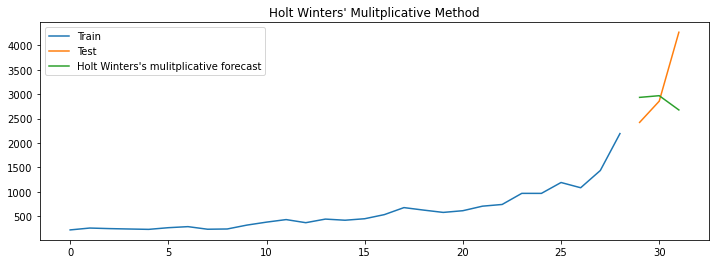

In [82]:
plt.figure(figsize=(12,4))
plt.plot( train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [83]:
#Calculate RMSE and MAPE

In [84]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_hwm['hw_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,1265.90,27.12
0,Simple exponential smoothing forecast,2107.13,59.17
0,Holt's exponential smoothing method,1889.86,52.00
0,Holt Winters' additive method,649.70,9.94
0,Holt Winters' multiplicative method,968.29,20.81
